# Газ Ван-дер-Ваальса

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate     

Наша функция:

In [2]:
def f(v,t):
    return (8*t*v**2/3 - 3*v + 1) / (v**3 - (v**2)/3 )

Ищем корни:

In [3]:
def roots (p, t):
    matrix = np.array([[0, 0, 1/p], [1, 0, -3/p], [0, 1, (8*t + p)/(3*p)]])
    eig = np.linalg.eig(matrix)[0]
    return eig

С - разность "площади прямоугольника" и интеграла нашей функции, должна равняться нулю. Соответственно, решаем уравнение С(р) = 0.

In [4]:
def search(t, right, left, rtol = 1e-5):

    p = (right + left) / 2
    a = np.min(roots(p, t))
    b = np.max(roots(p, t))
    c = integrate.quad(lambda x: f(x, t), a, b)[0] - p * (b - a)
    c_new = 10
    
    while ((np.abs((c_new - c)/c_new)) > rtol):
        if (c_new > 0):
            left = p
            p = (right + p)/2
            
        else:
            right = p
            p = (left + p)/2
            
        c = c_new        
        a = np.min(roots(p, t))
        b = np.max(roots(p, t))
        c_new = integrate.quad(lambda x: f(x, t), a, b)[0] - p * (b - a)
        
    return p

Результат:

C:\Users\Tom\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


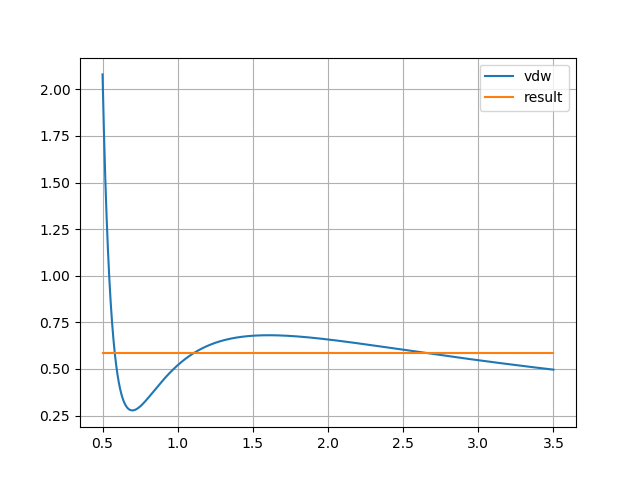

Result: 0.5873634664801153


In [6]:
tau=0.88
x = np.linspace(0.5, 3.5, 1000)
y = f(x, tau)

res = search(tau, 0.7, 0.3, 1e-5)
y1 = np.zeros(1000) + res

%matplotlib notebook
plt.plot(x,y, label = 'vdw')
plt.plot(x, y1, label = 'result')
plt.legend(loc='best')
plt.grid()
plt.show()
print("Result:", res)